In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('input/train.csv', na_values=['NAN','NA','NaN','na','nan'])
test_df = pd.read_csv('input/test.csv', na_values=['NAN','NA','NaN','na','nan'])

In [8]:
train_df.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
inst_id               301 non-null int64
OC                    301 non-null object
sido                  301 non-null object
sgg                   301 non-null int64
openDate              301 non-null int64
bedCount              296 non-null float64
instkind              300 non-null object
revenue1              293 non-null float64
salescost1            293 non-null float64
sga1                  293 non-null float64
salary1               293 non-null float64
noi1                  293 non-null float64
noe1                  293 non-null float64
interest1             293 non-null float64
ctax1                 293 non-null float64
profit1               293 non-null float64
liquidAsset1          293 non-null float64
quickAsset1           293 non-null float64
receivableS1          293 non-null float64
inventoryAsset1       293 non-null float64
nonCAsset1            293 non-null float64
t

In [12]:
train_df.apply(lambda x: sum(x.isnull()))

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [9]:
test_df.head()

,inst_id,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,incheon,139,1998-11-25,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,jeju,149,2016-03-09,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,jeonnam,103,1989-04-27,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,busan,71,2010-02-26,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,jeonbuk,26,2004-06-04,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 57 columns):
inst_id               127 non-null int64
sido                  127 non-null object
sgg                   127 non-null int64
openDate              126 non-null datetime64[ns]
bedCount              119 non-null float64
instkind              125 non-null object
revenue1              125 non-null float64
salescost1            125 non-null float64
sga1                  125 non-null float64
salary1               125 non-null float64
noi1                  125 non-null float64
noe1                  125 non-null float64
interest1             125 non-null float64
ctax1                 125 non-null float64
profit1               125 non-null float64
liquidAsset1          125 non-null float64
quickAsset1           125 non-null float64
receivableS1          125 non-null float64
inventoryAsset1       125 non-null float64
nonCAsset1            125 non-null float64
tanAsset1             125 non-null

In [13]:
test_df.apply(lambda x: sum(x.isnull()))

inst_id                0
sido                   0
sgg                    0
openDate               1
bedCount               8
instkind               2
revenue1               2
salescost1             2
sga1                   2
salary1                2
noi1                   2
noe1                   2
interest1              2
ctax1                  2
profit1                2
liquidAsset1           2
quickAsset1            2
receivableS1           2
inventoryAsset1        2
nonCAsset1             2
tanAsset1              2
OnonCAsset1            2
receivableL1           2
debt1                  2
liquidLiabilities1     2
shortLoan1             2
NCLiabilities1         2
longLoan1              2
netAsset1              2
surplus1               2
revenue2               2
salescost2             2
sga2                   2
salary2                2
noi2                   2
noe2                   2
interest2              2
ctax2                  2
profit2                2
liquidAsset2           2


In [3]:
X_train_df = train_df.drop(['OC'], axis=1)
test_df = test_df.drop(['OC'], axis=1)
X_train_df['openDate'] = pd.to_datetime(X_train_df.openDate, format='%Y%m%d', errors='coerce')
test_df['openDate'] = pd.to_datetime(test_df.openDate, format='%Y%m%d', errors='coerce')

In [4]:
X_all = pd.DataFrame(pd.concat([X_train_df, test_df], axis=0))

In [5]:
cols_num = list(X_all.select_dtypes(include=['int64','float64']).columns)
cols_cat = list(X_all.select_dtypes(include=['object']).columns)

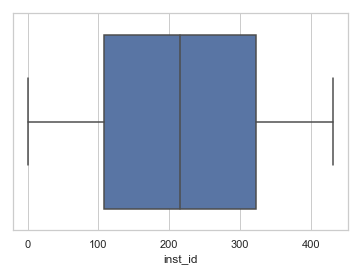

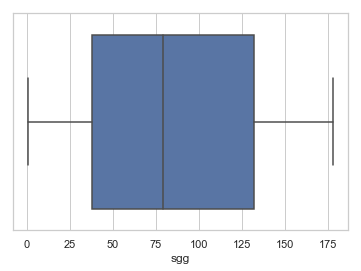

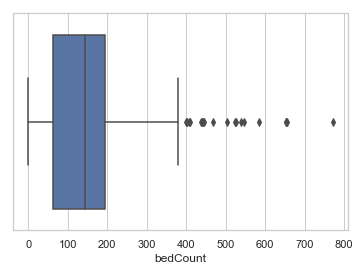

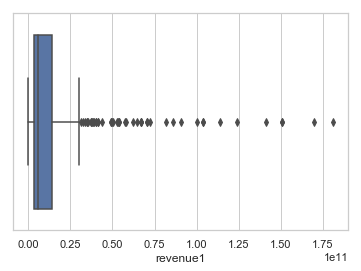

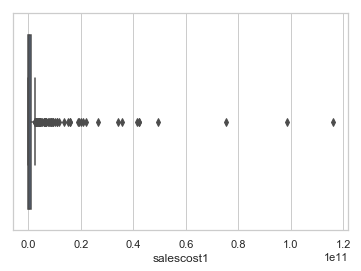

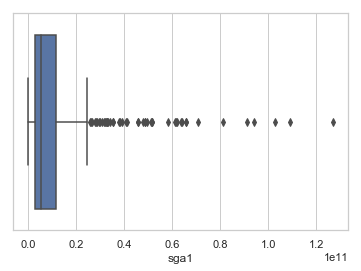

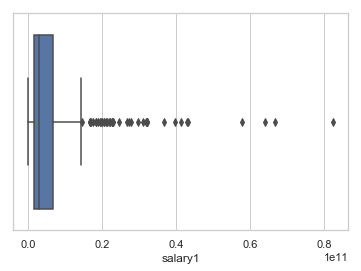

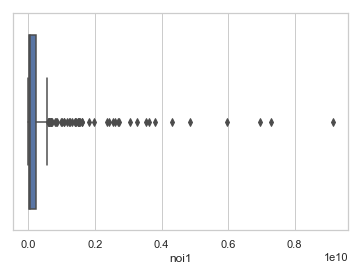

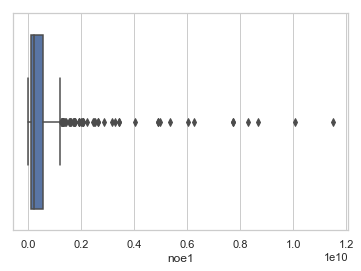

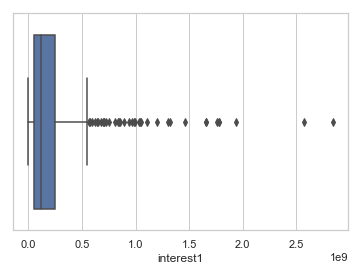

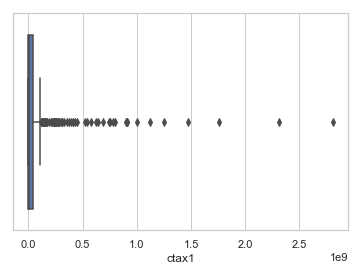

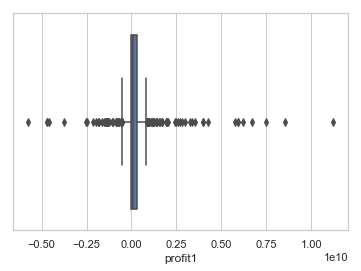

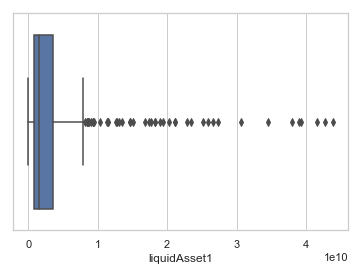

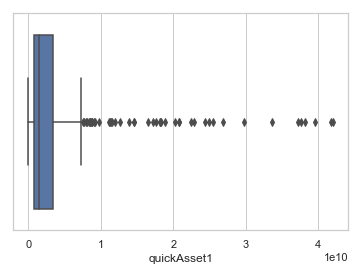

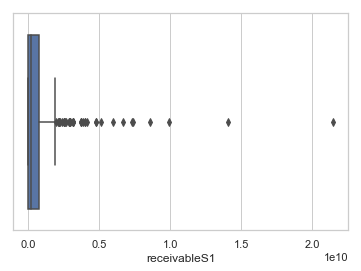

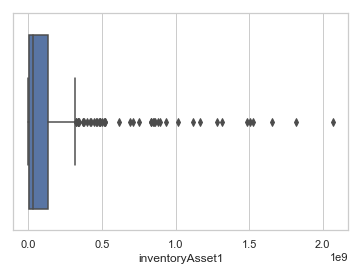

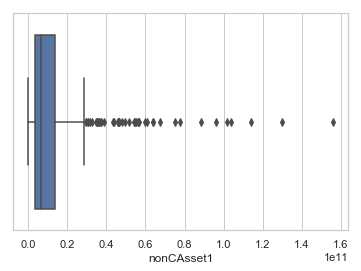

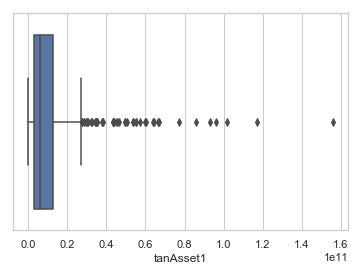

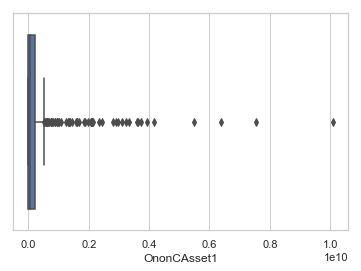

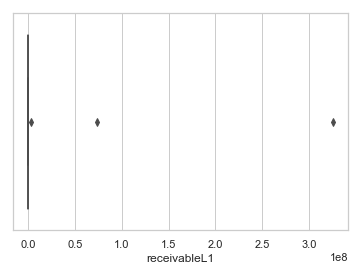

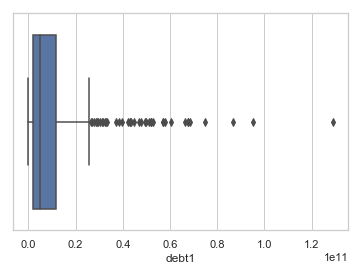

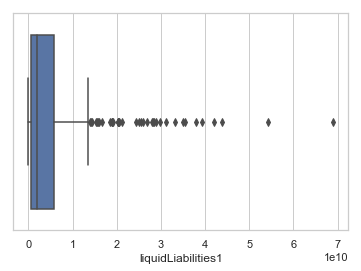

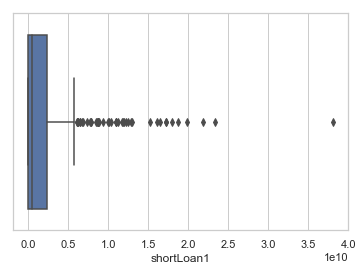

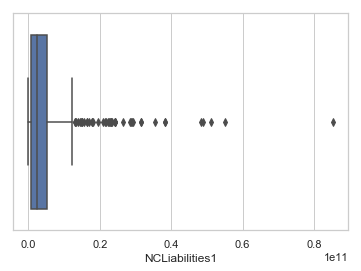

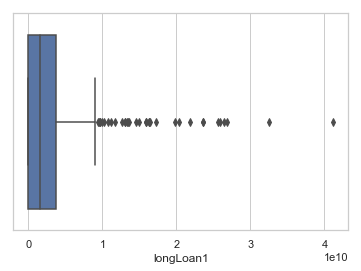

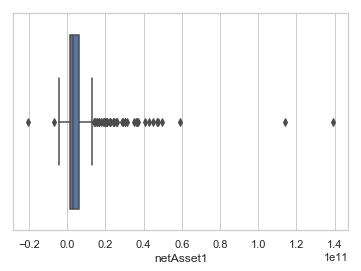

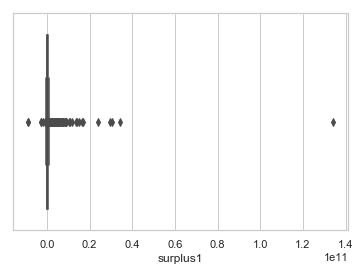

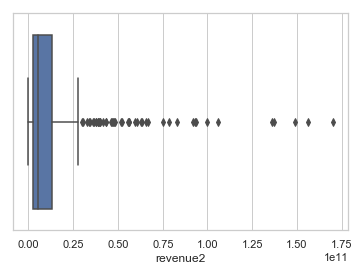

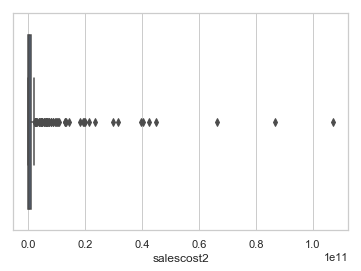

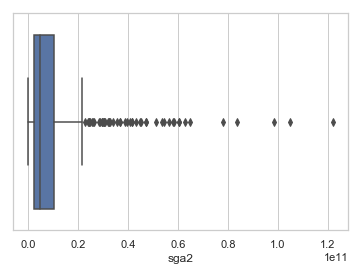

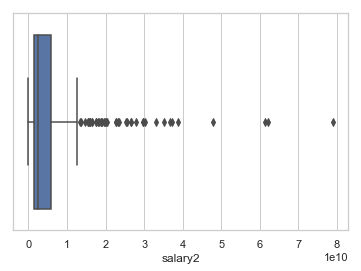

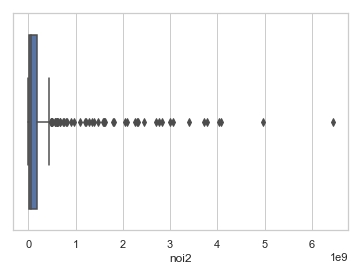

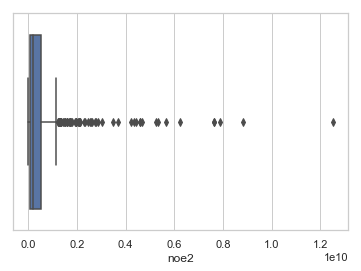

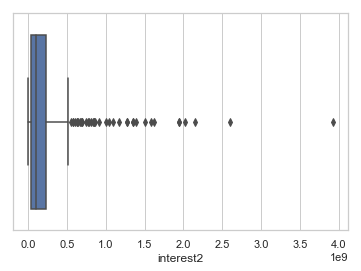

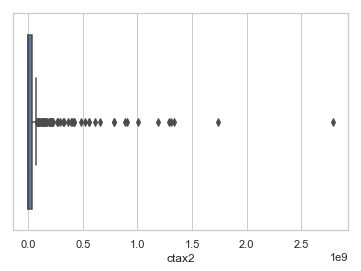

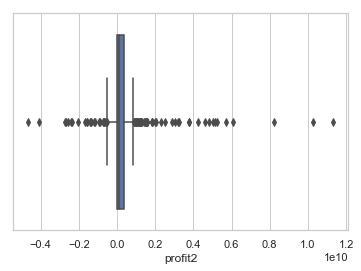

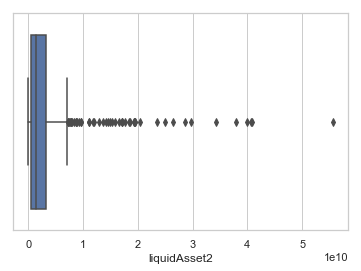

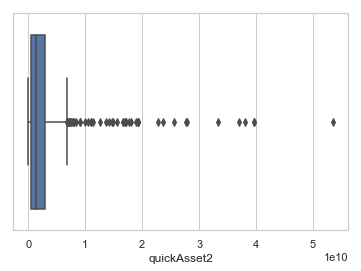

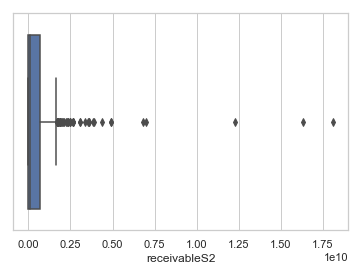

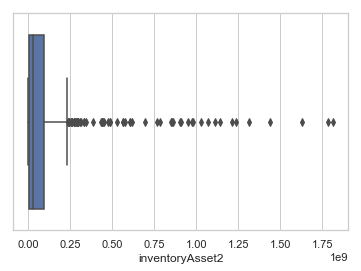

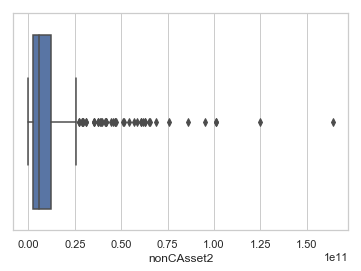

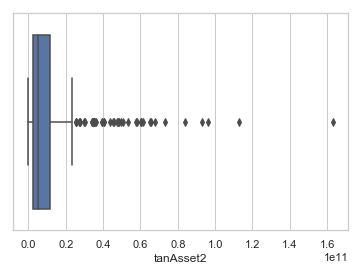

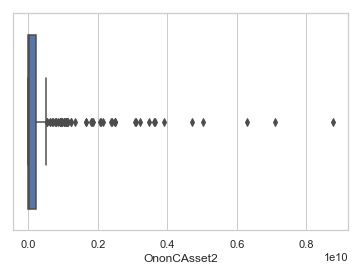

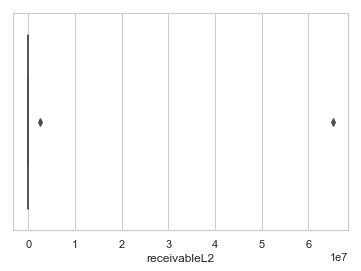

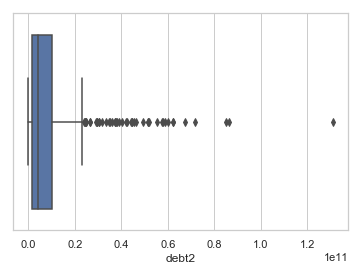

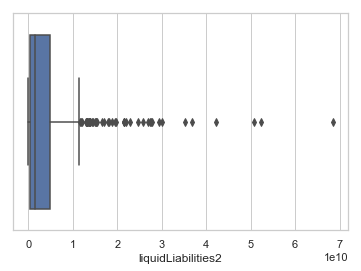

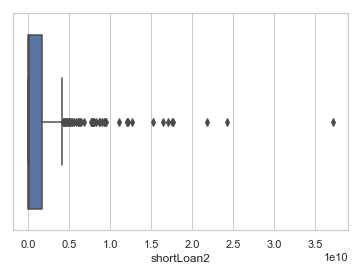

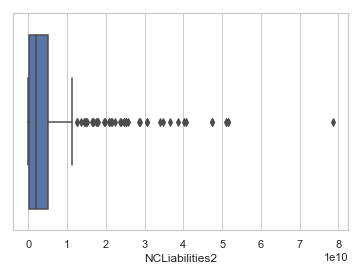

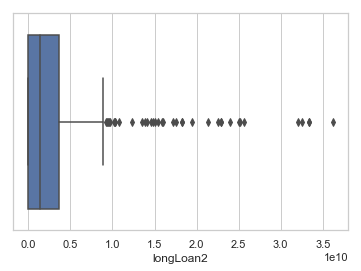

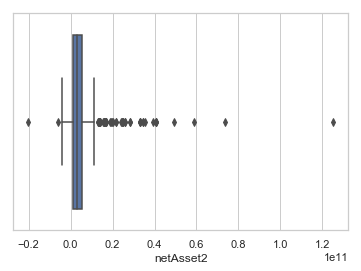

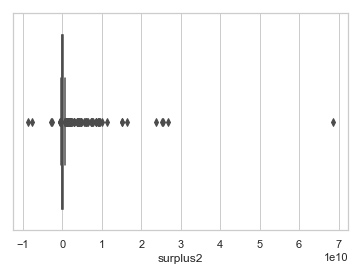

In [6]:
for c in cols_num:
    ax = sns.boxplot(x=X_all[c])
    plt.show()

In [7]:
X_all['surplus2'][X_all['surplus2'] < 0] = 0
X_all['netAsset1'][X_all['netAsset1'] < 0] = np.nan
X_all['netAsset2'][X_all['netAsset2'] < 0] = np.nan
X_all['surplus1'][X_all['surplus1'] < 0] = 0

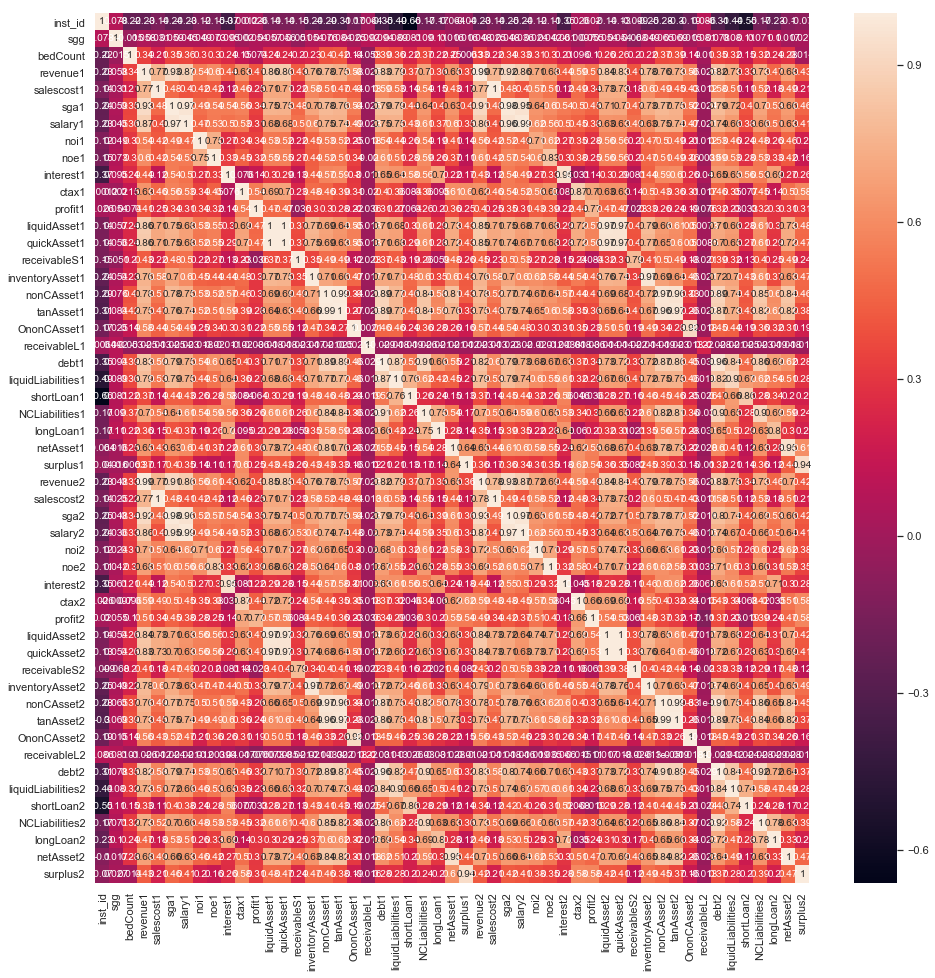

In [14]:
Var_Corr = X_all.corr()
# plot the heatmap and annotation on it
sz = 16
plt.figure(figsize=(sz, sz))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

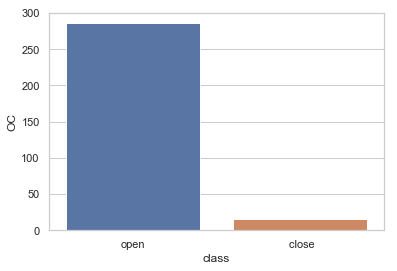

In [31]:
classes = pd.DataFrame(train_df.OC.value_counts())
classes['class'] = classes.index
ax = sns.barplot(x="class", y="OC", data=classes)

In [32]:
X_all.to_csv('input/X_all.csv', index=False)